# [CDAF] Atividade 2

## Nome
Nome: Rodrigo Felipe Lima Braz



## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre estatísticas agregadas. Para esta atividade, usaremos dados do Brasileirão 2022 do FBRef.

## Questão 1
- Baixe o dataset de resultados em https://fbref.com/en/comps/24/2022/schedule/2022-Serie-A-Scores-and-Fixtures
- Crie uma média móvel de 5 jogos, para cada equipe, de cada uma das seguintes estatísticas: xG pró, xG contra, e dif. xG.
- Escolha 4 times para visualizar a série temporal das estatísticas acima. Uma visualização para cada uma das estatísticas, onde a média geral do campeonato é apresentada com uma linha pontilhada em conjunto com a média móvel dos times escolhidos.
- Interprete os resultados. O que isso pode indicar sobre a qualidade ofensiva e defensiva dos times escolhidos?

In [1]:
#MÉDIA MÓVEL

import pandas as pd
df = pd.read_csv(r"C:\Users\rodri\Desktop\Atividades\Ciencia_de_dados_futebol\atv2\sportsref_download - sportsref_download.xls.csv")

df.dropna(subset= 'Home', inplace= True)

#Media movel do xG de cada time quando joga em casa, e de xG contra
df_xg_pro_casa = df.sort_values(by = ['Home']).reset_index(drop= True)
df_xg_pro_casa['time'] = df_xg_pro_casa['Home']
df_xg_pro_casa['media_movel_xG_pro'] = df_xg_pro_casa['xG'].rolling(5, min_periods=1).mean()
df_xg_pro_casa['media_movel_xG_contra'] = df_xg_pro_casa['xG.1'].rolling(5, min_periods=1).mean()


#Media movel do xG de cada time quando joga fora, e de xG contra
df_xg_pro_fora = df.sort_values(by = ['Away']).reset_index(drop= True)
df_xg_pro_fora['time'] = df_xg_pro_fora['Away']
df_xg_pro_fora['media_movel_xG_pro'] = df_xg_pro_fora['xG.1'].rolling(5, min_periods=1).mean()
df_xg_pro_fora['media_movel_xG_contra'] = df_xg_pro_fora['xG'].rolling(5, min_periods=1).mean()

#Media movel da dif do xG
df_xg = pd.concat([df_xg_pro_casa ,df_xg_pro_fora]).reset_index(drop= True)
df_xg = df_xg.sort_values(by = ['time']).reset_index(drop= True)
df_xg['media_movel_dif_xG'] = (df_xg['media_movel_xG_pro'] - df_xg['media_movel_xG_contra']).rolling(5, min_periods=1).mean()

#printando so o que interessa...
df_xg


Wk  Day        Date   Time              Home   xG Score  xG.1  \
0    33.0  Sat  2022-10-22  19:00      América (MG)  0.8   1–2   1.2   
1    14.0  Sat  2022-06-25  19:00          Flamengo  4.1   3–0   0.9   
2     1.0  Sun  2022-04-10  19:00              Avaí  1.0   1–0   0.3   
3    19.0  Sun  2022-07-24  18:00    Atl Goianiense  1.7   0–1   0.7   
4    31.0  Sun  2022-10-09  18:00        Fluminense  1.0   0–2   1.7   
..    ...  ...         ...    ...               ...  ...   ...   ...   
755  17.0  Sun  2022-07-17  16:00         São Paulo  0.8   2–2   1.2   
756  29.0  Thu  2022-10-20  20:00         São Paulo  2.3   3–1   0.7   
757  22.0  Sun  2022-08-14  16:00         São Paulo  1.5   3–0   0.5   
758  30.0  Thu  2022-10-06  20:00      América (MG)  1.0   1–2   1.8   
759  16.0  Sun  2022-07-10  18:00  Atlético Mineiro  0.7   0–0   0.3   

             Away Attendance                               Venue  \
0        Flamengo        NaN            Estádio Raimundo Sampaio   
1    América (MG)     42,931      Estadio Jornalista Mário Filho   
2    América (MG)      5,081      Estádio Aderbal Ramos da Silva   
3    América (MG)      5,098             Estádio Antônio Accioly   
4    América (MG)     23,324      Estadio Jornalista Mário Filho   
..            ...        ...                                 ...   
755    Fluminense     47,141                  Estádio do Morumbi   
756      Coritiba        NaN                  Estádio do Morumbi   
757    Bragantino     31,358                  Estádio do Morumbi   
758     São Paulo      3,916            Estádio Raimundo Sampaio   
759     São Paulo     52,356  Estádio Governador Magalhães Pinto   

                            Referee  Match Report  Notes          time  \
0        Jean Pierre Goncalves Lima  Match Report    NaN  América (MG)   
1                 Ramon Abatti Abel  Match Report    NaN  América (MG)   
2           Luiz Flávio de Oliveira  Match Report    NaN  América (MG)   
3        Jean Pierre Goncalves Lima  Match Report    NaN  América (MG)   
4              Leandro Pedro Vuaden  Match Report    NaN  América (MG)   
..                              ...           ...    ...           ...   
755                  Wilton Sampaio  Match Report    NaN     São Paulo   
756       Flavio Rodrigues De Souza  Match Report    NaN     São Paulo   
757  Paulo Cesar Zanovelli da Silva  Match Report    NaN     São Paulo   
758               Ramon Abatti Abel  Match Report    NaN     São Paulo   
759                Anderson Daronco  Match Report    NaN     São Paulo   

     media_movel_xG_pro  media_movel_xG_contra  media_movel_dif_xG  
0                  0.80                   1.20           -0.400000  
1                  0.85                   2.60           -1.075000  
2                  0.88                   1.42           -0.896667  
3                  0.92                   1.58           -0.837500  
4                  0.86                   1.42           -0.782000  
..                  ...                    ...                 ...  
755                1.34                   1.28            0.364000  
756                1.54                   1.20            0.332000  
757                1.56                   1.00            0.388000  
758                1.34                   1.38            0.276000  
759                1.34                   1.38            0.176000  

[760 rows x 18 columns]

In [2]:
import matplotlib.pyplot as plt
import matplotlib as m
import numpy as np


df_xg['Date'] = pd.to_datetime(df_xg['Date'])
df_xg = df_xg.sort_values(by = ['Date']).reset_index(drop= True)

df_xg = df_xg.set_index('Date')
df_times = df_xg[(df_xg['time'] == 'Atlético Mineiro') | (df_xg['time'] == 'América (MG)') |  (df_xg['time'] == 'Santos') |  (df_xg['time'] == 'Palmeiras')]



<function matplotlib.pyplot.show(close=None, block=None)>

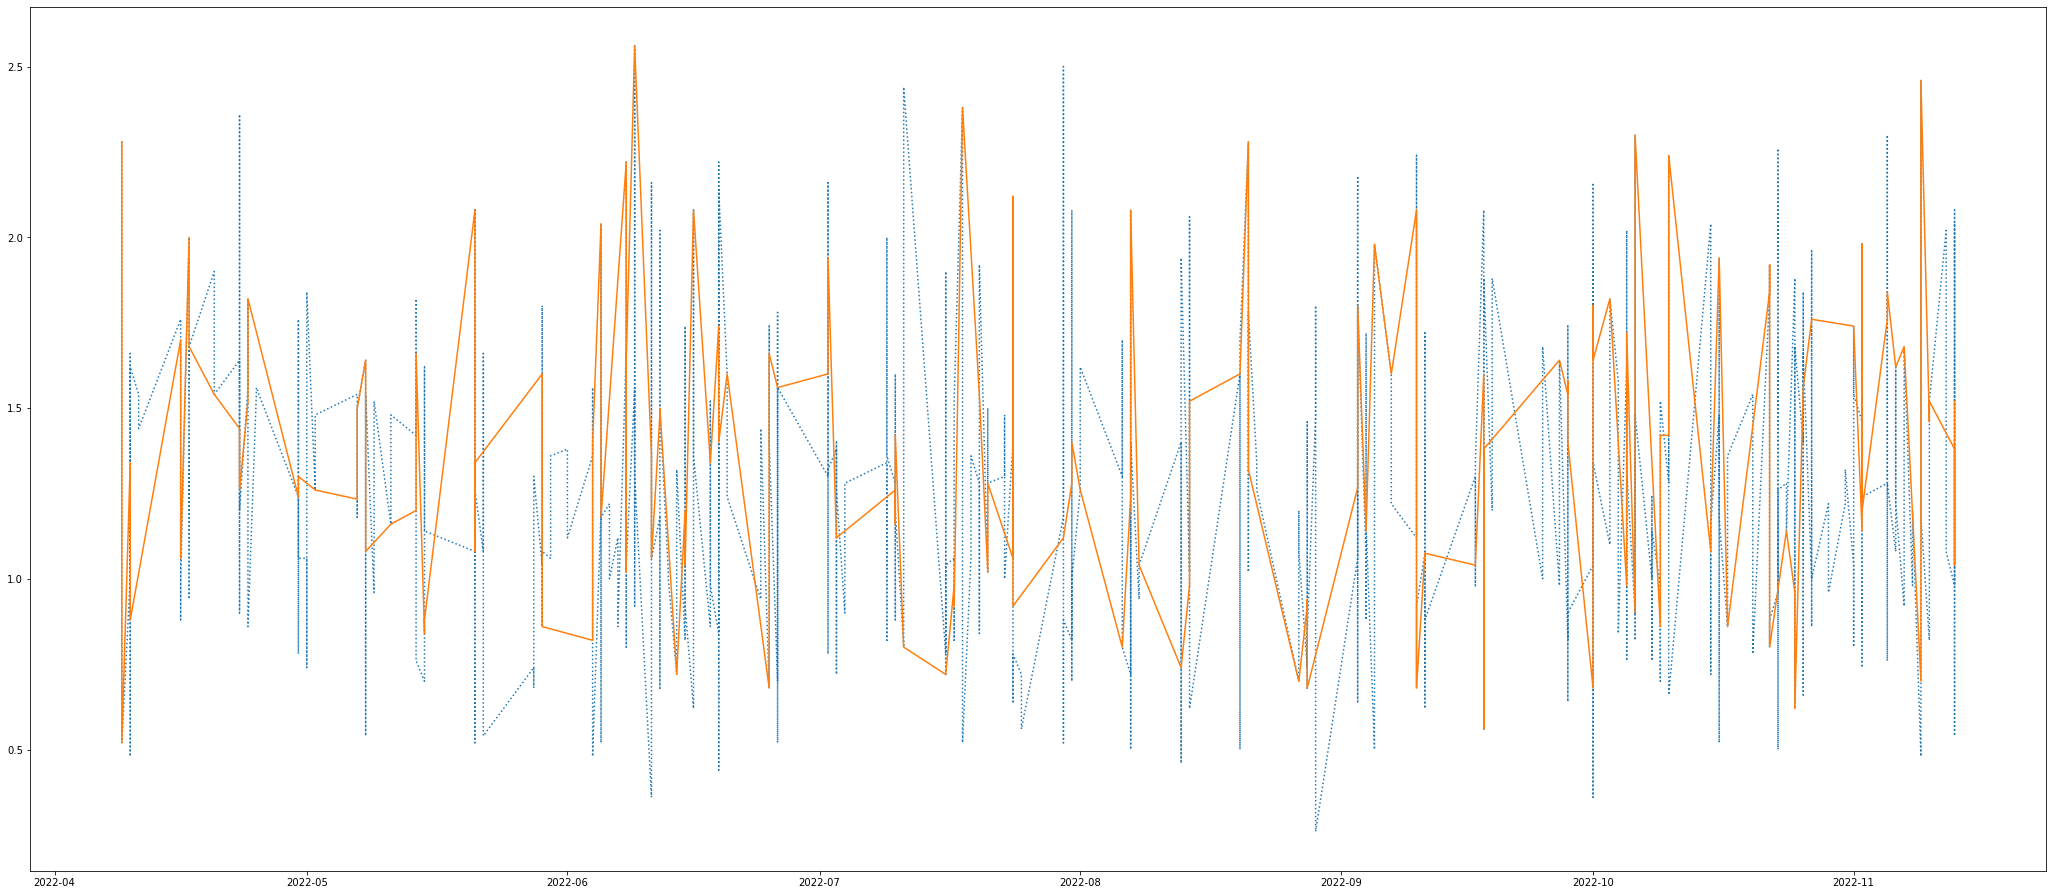

In [3]:
#Plotando a media movel de xG pro, comparando os times a media do campeonato.


fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([0,0,2,2])
ax.plot(df_xg['media_movel_xG_pro'], linestyle='dotted')
ax.plot(df_times['media_movel_xG_pro'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

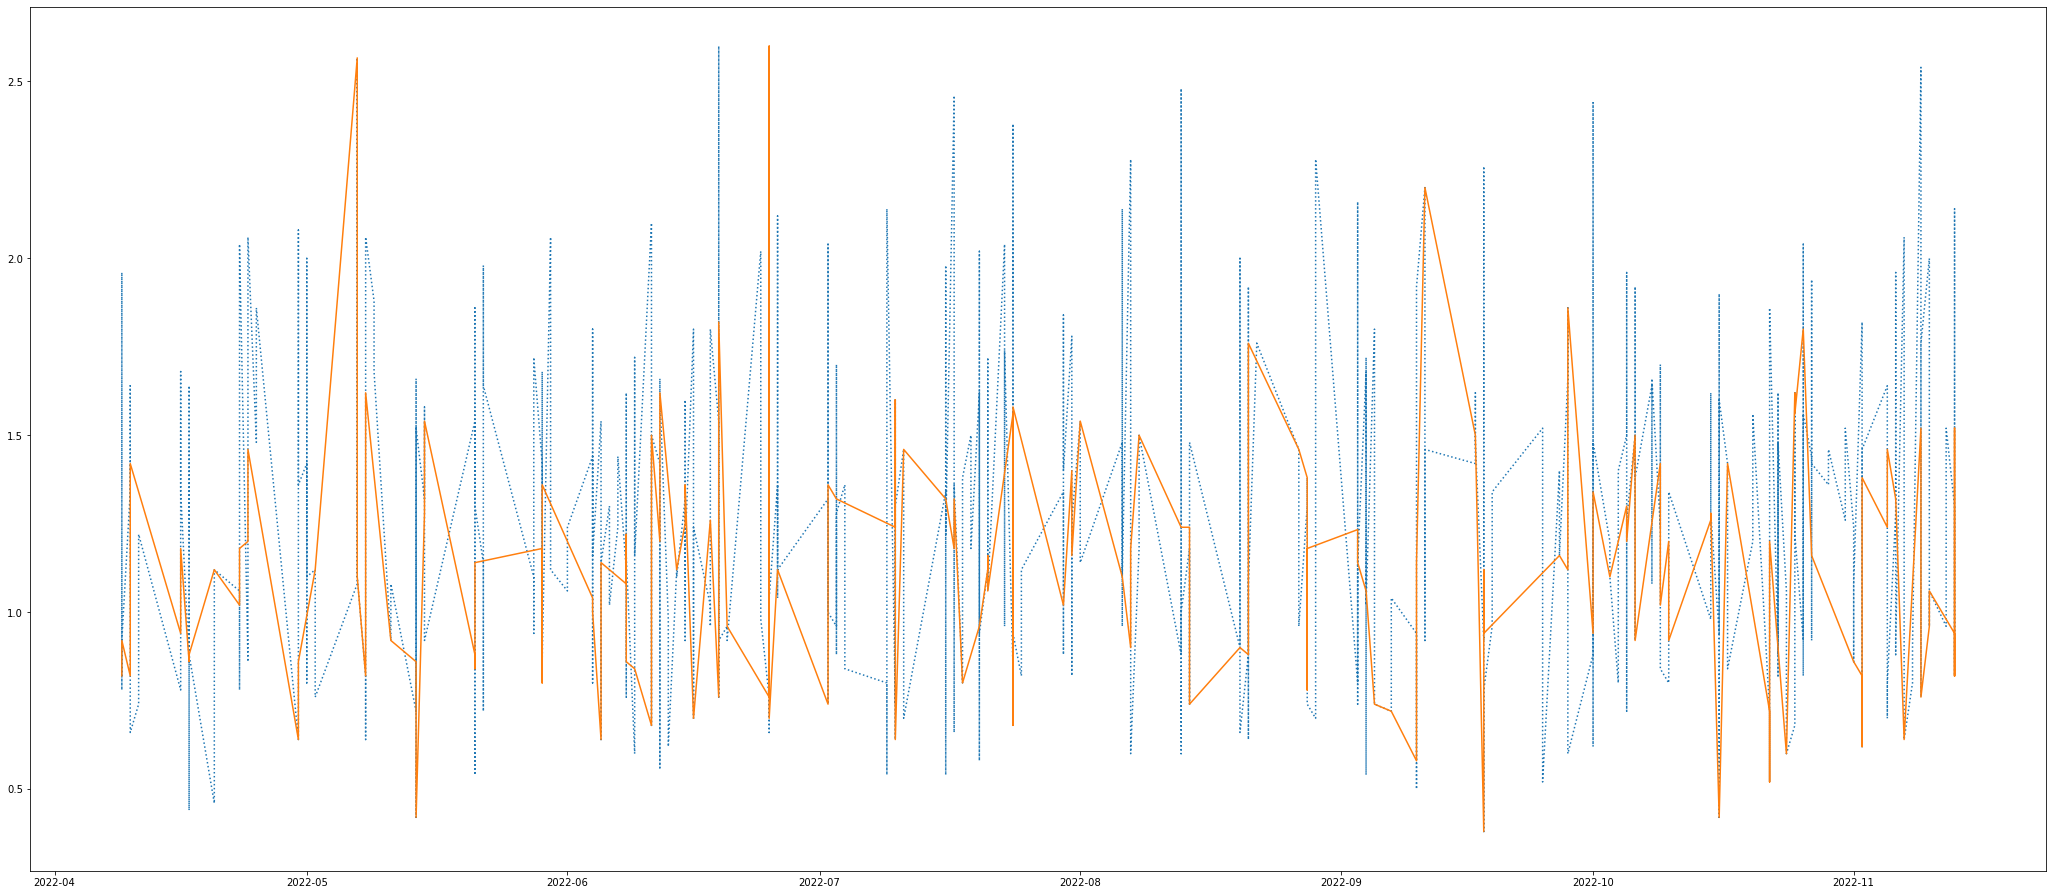

In [4]:
#Plotando a media movel de xG contra, comparando os times a media do campeonato.


fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([0,0,2,2])
ax.plot(df_xg['media_movel_xG_contra'], linestyle='dotted')
ax.plot(df_times['media_movel_xG_contra'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

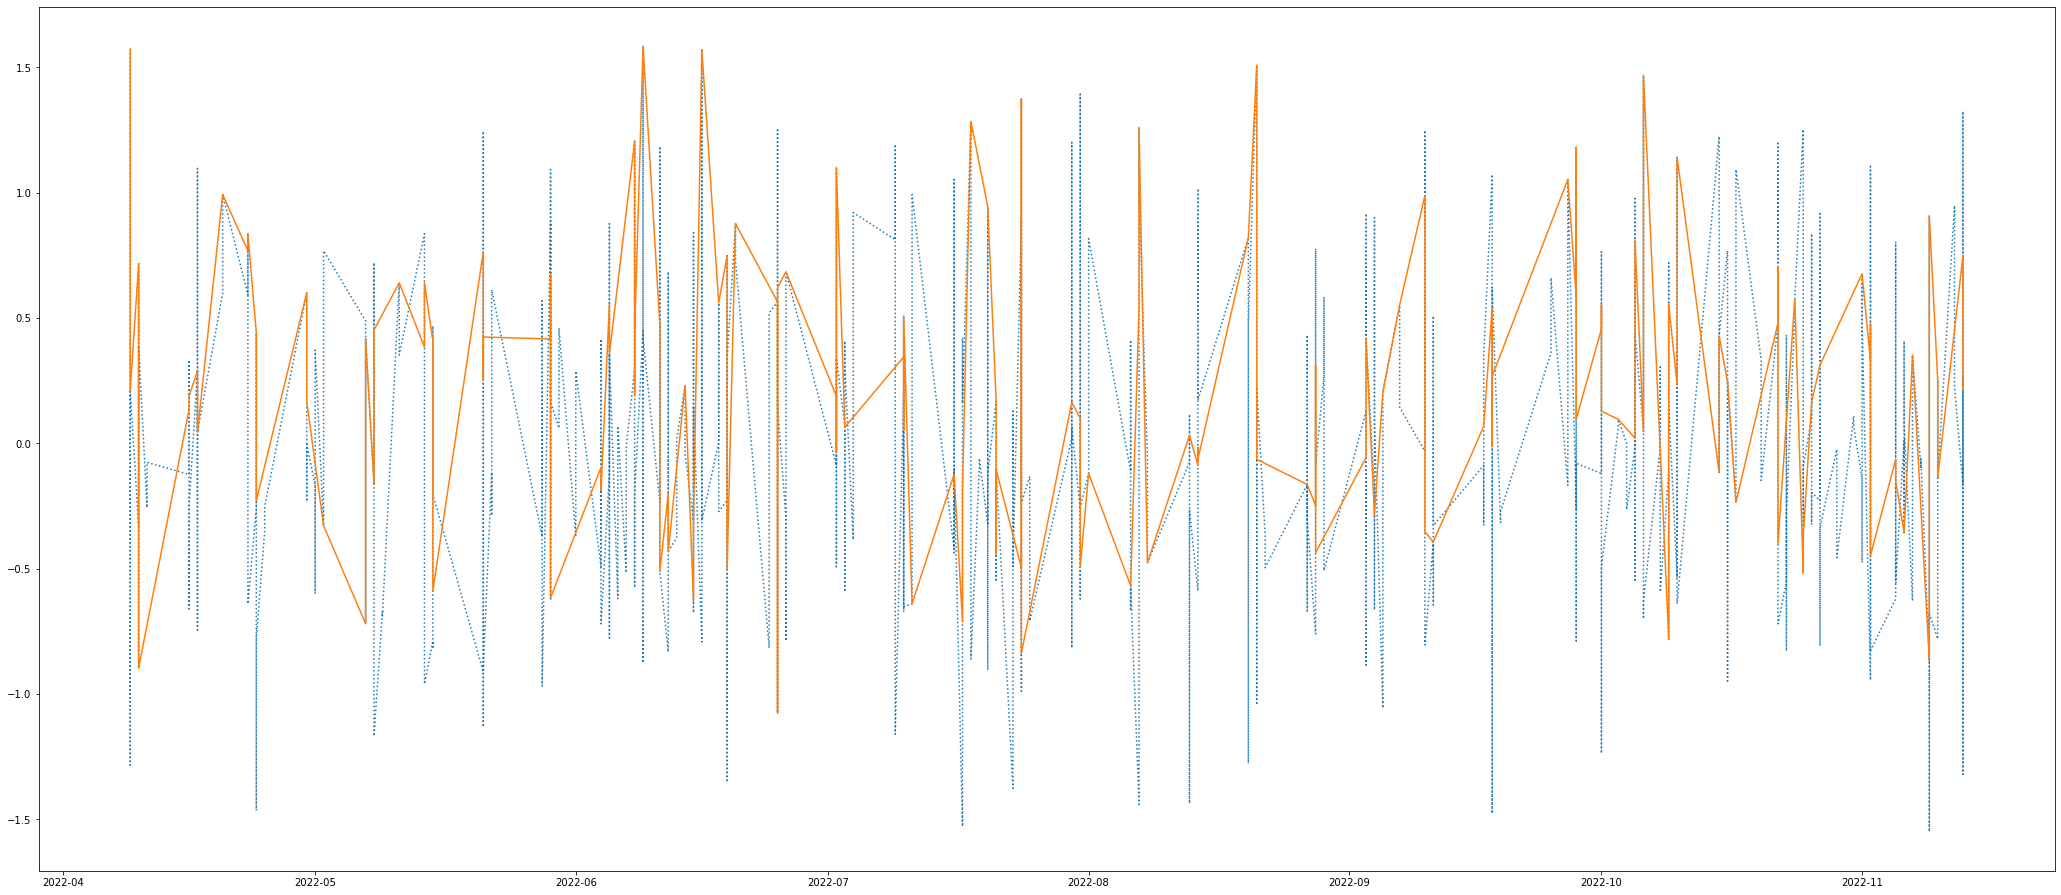

In [5]:
#Plotando a media movel da diferença de xG, comparando os times a media do campeonato.

fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([0,0,2,2])
ax.plot(df_xg['media_movel_dif_xG'], linestyle='dotted')
ax.plot(df_times['media_movel_dif_xG'])
plt.show

Resposta:
Comparando os gráficos, podemos dizer que no geral, por eu ter escolhido times de diferentes colocações, ficou equilibrado as comparações desse grupo de times com o geral. No gráfico de comparação do xG pro, podemos ver que os máximos locais costumam ser dos times escolhidos, o que pode indicar uma qualidade ofensiva deles se comparado ao todo, teoria que se consolida, quando olhamos o gráfico de diferença de xG, onde os máximos locais também são dos times escolhidos, e os mínimos locais e globais são da média global. Além disso, quando olhamos o gráfico de xG contra, os máximos locais e o máximo local também são da média do todo, o que pode indicar uma qualidade também defensiva melhor dos times selecionados.

## Questão 2
- Agora repita a questão 1, plotando as séries temporais dos mesmos times, mas para uma janela móvel de 10 jogos.
- Quais as diferenças entre as séries temporais de 5 e 10 jogos? Em quais situações pode ser vantajoso escolher uma janela à outra?

In [6]:
#Recalculando as médias moveis, com a janela maior.

#Media movel do xG de cada time quando joga em casa, e de xG contra
df_xg_pro_casa_2 = df.sort_values(by = ['Home']).reset_index(drop= True)
df_xg_pro_casa_2['time'] = df_xg_pro_casa_2['Home']
df_xg_pro_casa_2['media_movel_xG_pro'] = df_xg_pro_casa_2['xG'].rolling(10, min_periods=1).mean()
df_xg_pro_casa_2['media_movel_xG_contra'] = df_xg_pro_casa_2['xG.1'].rolling(10, min_periods=1).mean()


#Media movel do xG de cada time quando joga fora, e de xG contra
df_xg_pro_fora2 = df.sort_values(by = ['Away']).reset_index(drop= True)
df_xg_pro_fora2['time'] = df_xg_pro_fora2['Away']
df_xg_pro_fora2['media_movel_xG_pro'] = df_xg_pro_fora2['xG.1'].rolling(10, min_periods=1).mean()
df_xg_pro_fora2['media_movel_xG_contra'] = df_xg_pro_fora2['xG'].rolling(10, min_periods=1).mean()

#Media movel da dif do xG
df_xg2 = pd.concat([df_xg_pro_casa_2 ,df_xg_pro_fora2]).reset_index(drop= True)
df_xg2 = df_xg2.sort_values(by = ['time']).reset_index(drop= True)
df_xg2['media_movel_dif_xG'] = (df_xg2['media_movel_xG_pro'] - df_xg2['media_movel_xG_contra']).rolling(5, min_periods=1).mean()

#printando so o que interessa...
df_xg2


Wk  Day        Date   Time              Home   xG Score  xG.1  \
0    33.0  Sat  2022-10-22  19:00      América (MG)  0.8   1–2   1.2   
1    14.0  Sat  2022-06-25  19:00          Flamengo  4.1   3–0   0.9   
2     1.0  Sun  2022-04-10  19:00              Avaí  1.0   1–0   0.3   
3    19.0  Sun  2022-07-24  18:00    Atl Goianiense  1.7   0–1   0.7   
4    31.0  Sun  2022-10-09  18:00        Fluminense  1.0   0–2   1.7   
..    ...  ...         ...    ...               ...  ...   ...   ...   
755  17.0  Sun  2022-07-17  16:00         São Paulo  0.8   2–2   1.2   
756  29.0  Thu  2022-10-20  20:00         São Paulo  2.3   3–1   0.7   
757  22.0  Sun  2022-08-14  16:00         São Paulo  1.5   3–0   0.5   
758  30.0  Thu  2022-10-06  20:00      América (MG)  1.0   1–2   1.8   
759  16.0  Sun  2022-07-10  18:00  Atlético Mineiro  0.7   0–0   0.3   

             Away Attendance                               Venue  \
0        Flamengo        NaN            Estádio Raimundo Sampaio   
1    América (MG)     42,931      Estadio Jornalista Mário Filho   
2    América (MG)      5,081      Estádio Aderbal Ramos da Silva   
3    América (MG)      5,098             Estádio Antônio Accioly   
4    América (MG)     23,324      Estadio Jornalista Mário Filho   
..            ...        ...                                 ...   
755    Fluminense     47,141                  Estádio do Morumbi   
756      Coritiba        NaN                  Estádio do Morumbi   
757    Bragantino     31,358                  Estádio do Morumbi   
758     São Paulo      3,916            Estádio Raimundo Sampaio   
759     São Paulo     52,356  Estádio Governador Magalhães Pinto   

                            Referee  Match Report  Notes          time  \
0        Jean Pierre Goncalves Lima  Match Report    NaN  América (MG)   
1                 Ramon Abatti Abel  Match Report    NaN  América (MG)   
2           Luiz Flávio de Oliveira  Match Report    NaN  América (MG)   
3        Jean Pierre Goncalves Lima  Match Report    NaN  América (MG)   
4              Leandro Pedro Vuaden  Match Report    NaN  América (MG)   
..                              ...           ...    ...           ...   
755                  Wilton Sampaio  Match Report    NaN     São Paulo   
756       Flavio Rodrigues De Souza  Match Report    NaN     São Paulo   
757  Paulo Cesar Zanovelli da Silva  Match Report    NaN     São Paulo   
758               Ramon Abatti Abel  Match Report    NaN     São Paulo   
759                Anderson Daronco  Match Report    NaN     São Paulo   

     media_movel_xG_pro  media_movel_xG_contra  media_movel_dif_xG  
0                  0.80                   1.20           -0.400000  
1                  0.85                   2.60           -1.075000  
2                  0.84                   1.44           -0.916667  
3                  0.90                   1.56           -0.852500  
4                  1.09                   1.59           -0.782000  
..                  ...                    ...                 ...  
755                1.40                   1.01            0.570000  
756                1.47                   1.05            0.508000  
757                1.49                   1.07            0.448000  
758                1.29                   1.54            0.274000  
759                1.15                   1.47            0.132000  

[760 rows x 18 columns]

In [7]:
#Refazendo os gráficos

df_xg2['Date'] = pd.to_datetime(df_xg2['Date'])
df_xg2 = df_xg2.sort_values(by = ['Date']).reset_index(drop= True)

df_xg2 = df_xg2.set_index('Date')
df_times2 = df_xg2[(df_xg2['time'] == 'Atlético Mineiro') | (df_xg2['time'] == 'América (MG)') |  (df_xg2['time'] == 'Santos') |  (df_xg2['time'] == 'Palmeiras')]

<function matplotlib.pyplot.show(close=None, block=None)>

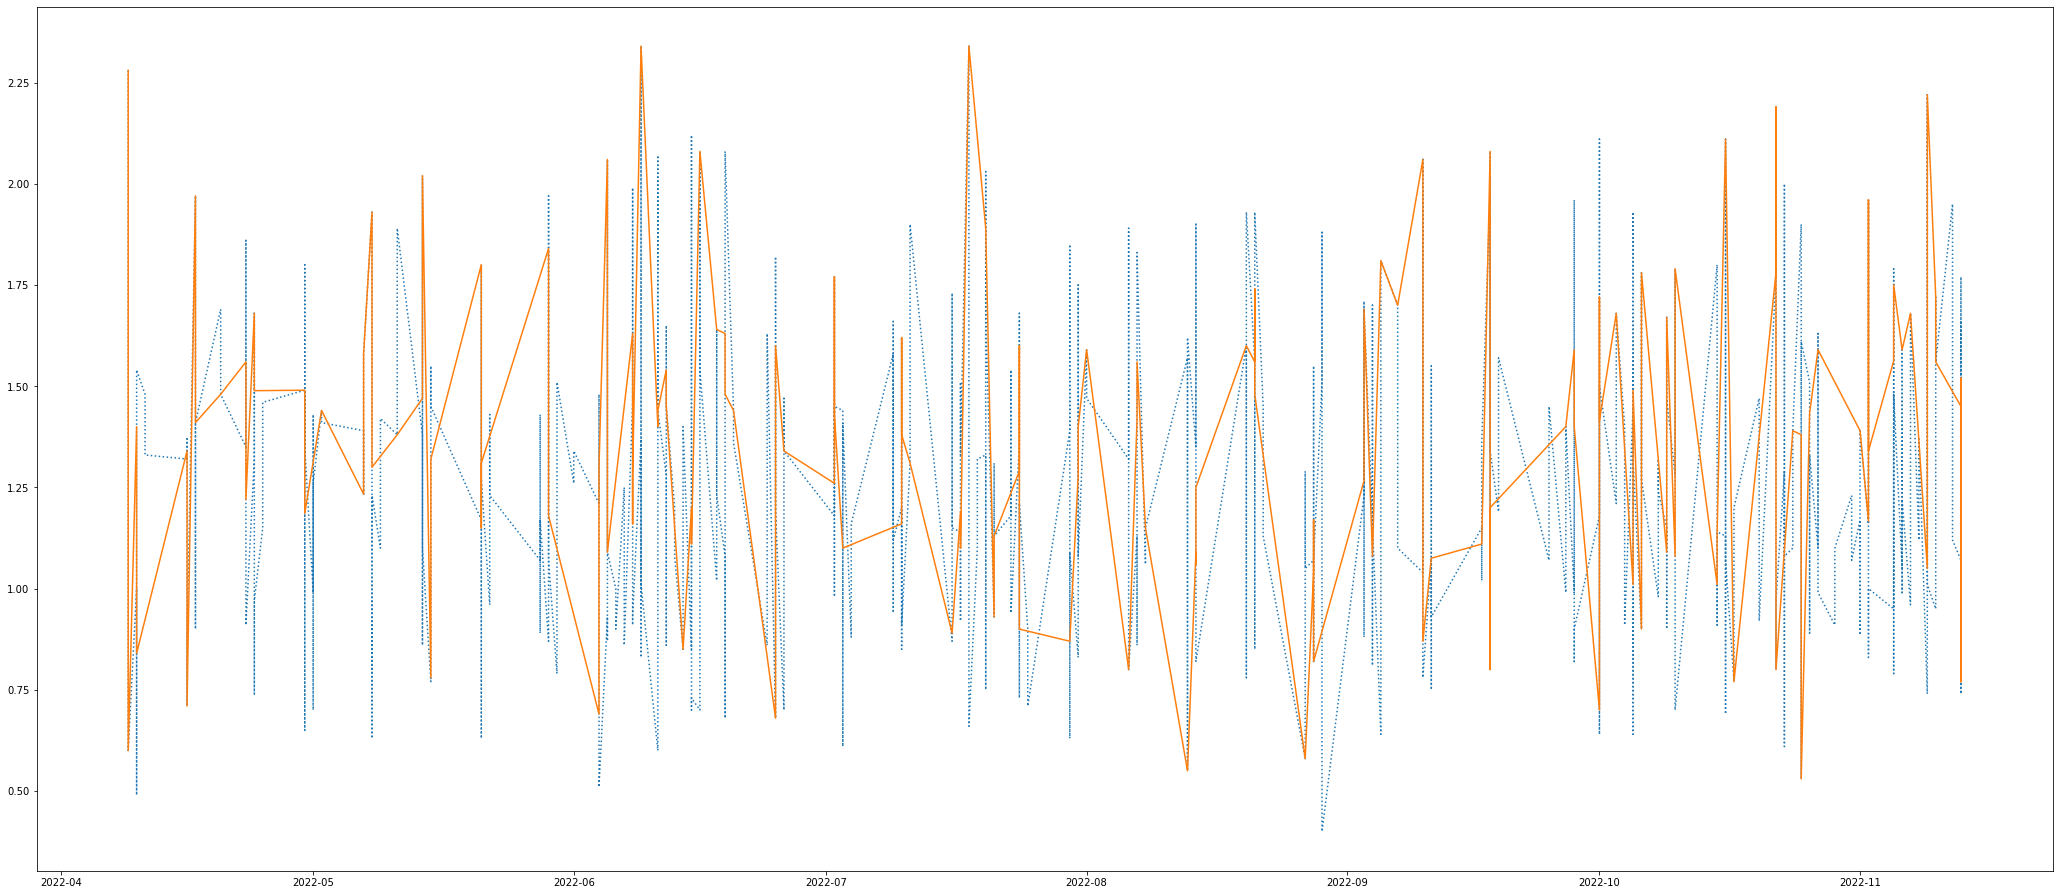

In [8]:
#Plotando a media movel aumentada de xG pro, comparando os times a media do campeonato.


fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([0,0,2,2])
ax.plot(df_xg2['media_movel_xG_pro'], linestyle='dotted')
ax.plot(df_times2['media_movel_xG_pro'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

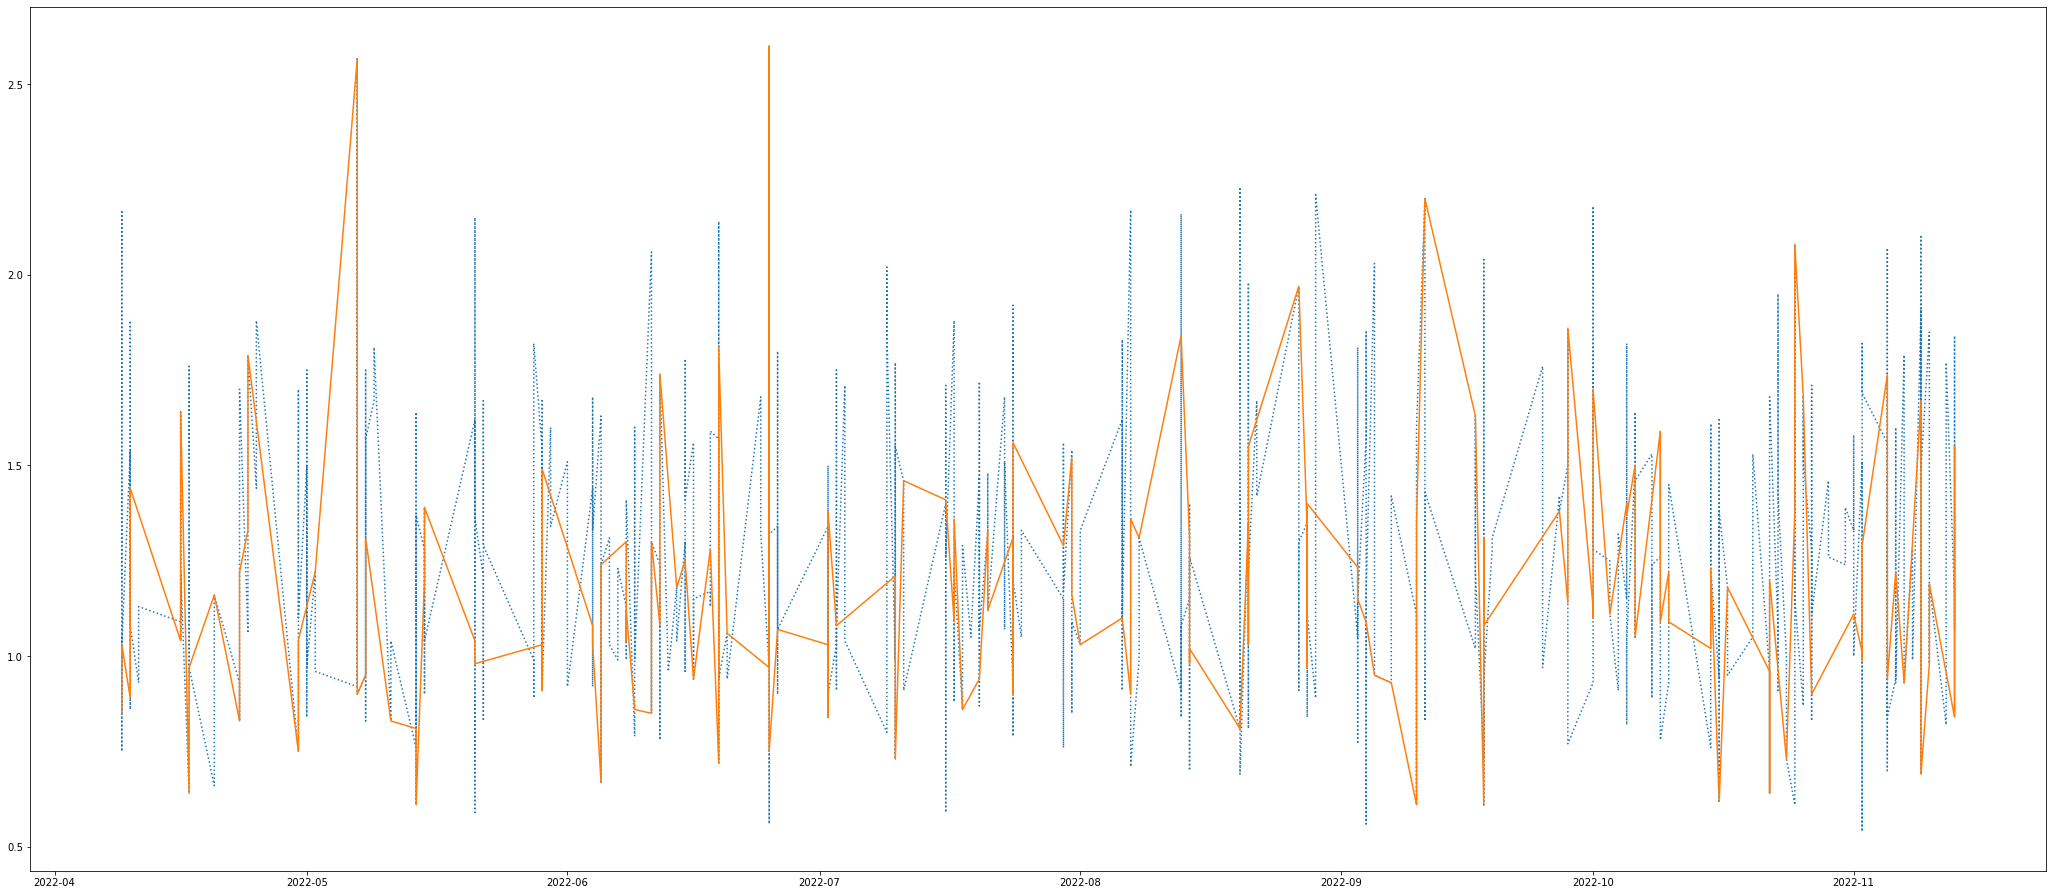

In [9]:
#Plotando a media movel aumentada de xG contra, comparando os times a media do campeonato.


fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([0,0,2,2])
ax.plot(df_xg2['media_movel_xG_contra'], linestyle='dotted')
ax.plot(df_times2['media_movel_xG_contra'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

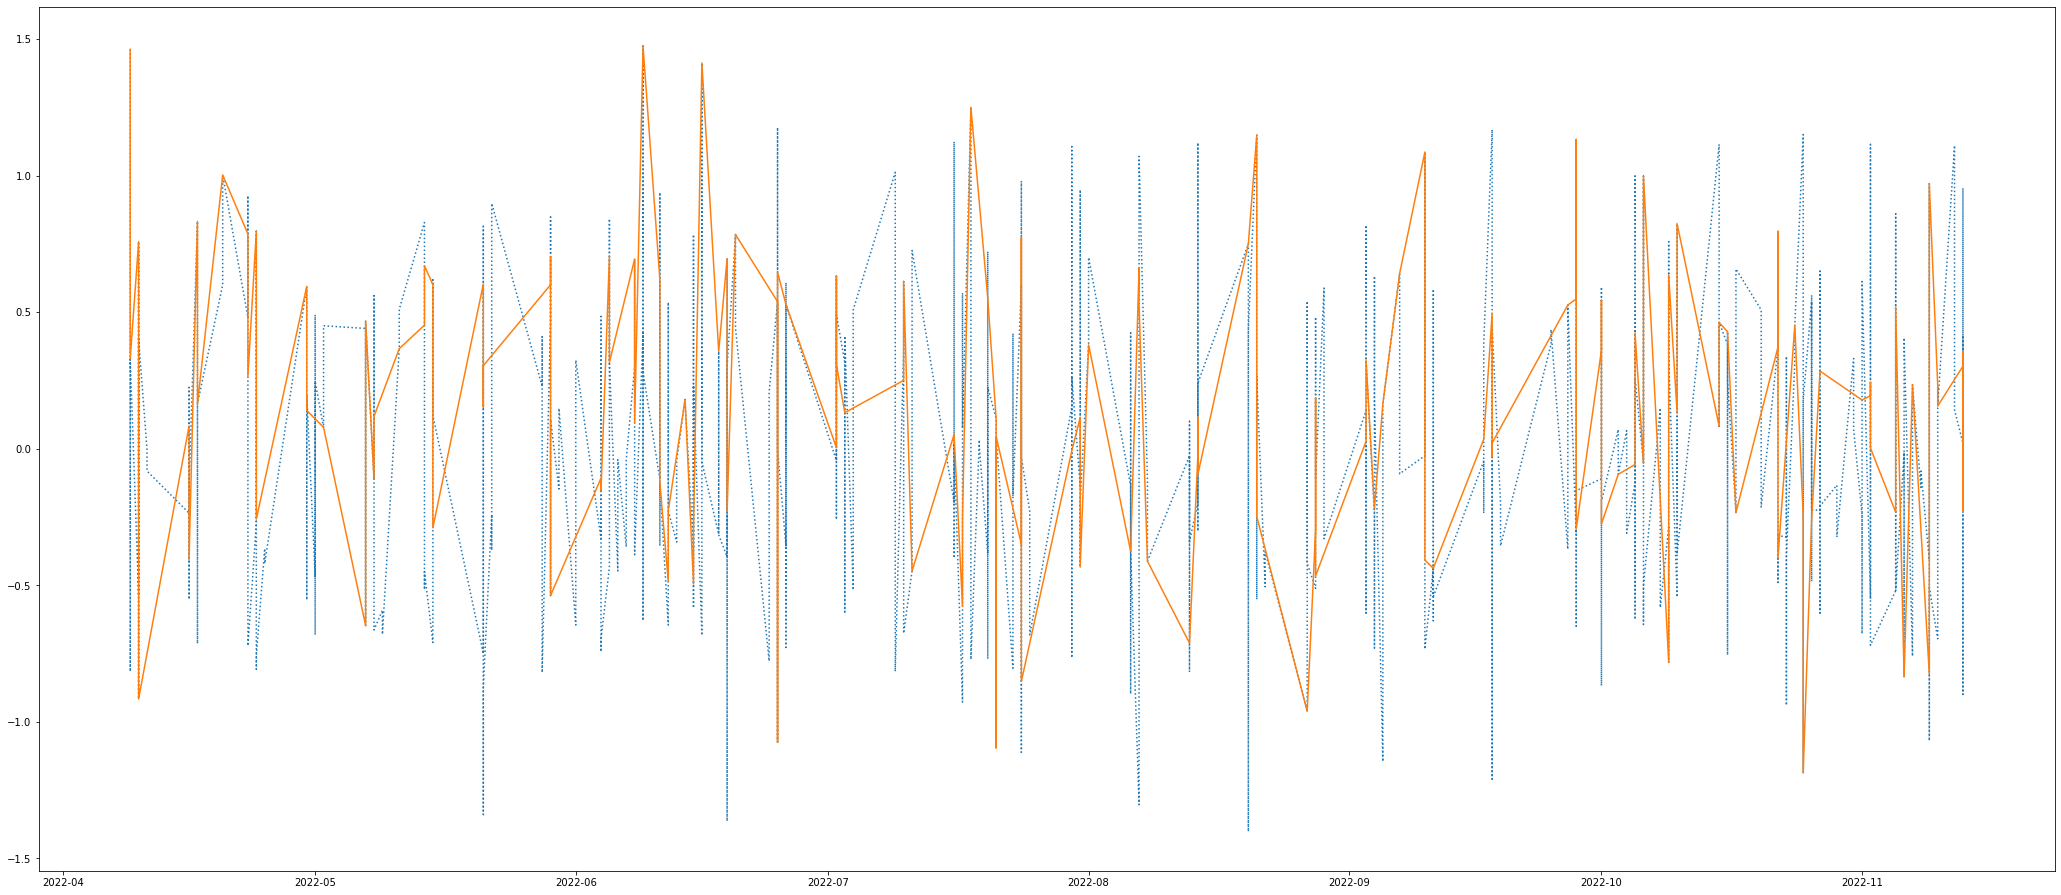

In [10]:
#Plotando a media movel aumentada da diferença de xG, comparando os times a media do campeonato.

fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([0,0,2,2])
ax.plot(df_xg2['media_movel_dif_xG'], linestyle='dotted')
ax.plot(df_times2['media_movel_dif_xG'])
plt.show

Resposta: A média móvel de janela maior, é menos sensível a mudanças bruscas de um prazo menor, o que pode ser interessante para se analisar as tendências a longo prazo. Já a média movel de janela menor, é mais sensível a essas mudanças podendo ser mais adequada, ou para analisar comportamento a um prazo menor, ou indentificar picos na analise da série temporal.

## Questão 3
- Vá para o link
-- https://fbref.com/en/comps/24/2022/stats/2022-Serie-A-Stats
- Nesta seção de estatísticas, é possível navegar por estatísticas específicas para diferentes aspectos do jogo (finalização, passe, defesa, etc.). Para todos exercícios à partir deste, você terá que selecionar aquelas que julgar mais relevantes para responder as questões.
- Monte um radar plot com 6 atributos relevantes para atacantes e compare 3 jogadores de sua escolha. Justifique a escolha de cada um dos atributos, a escolha da escala dos radares e o tipo de normalização. Interprete os resultados dos radares em termos das qualidades e limitações dos jogadores.
- Ref Soccermatics:
-- https://soccermatics.readthedocs.io/en/latest/lesson3/ScoutingPlayers.html
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson3/plot_RadarPlot.html

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df_atacantes_metricas = pd.read_csv(r"C:\Users\rodri\Desktop\Atividades\Ciencia_de_dados_futebol\atv2\atacante_chutes.txt", sep=',', skiprows=1)
df_atacantes_passes = pd.read_csv(r"C:\Users\rodri\Desktop\Atividades\Ciencia_de_dados_futebol\atv2\atacantes_assists.txt", sep=',', skiprows=1)

df_atacantes_passes = df_atacantes_passes[['Player', 'Ast', 'G+A', 'xAG']]

df_atacantes_metricas = df_atacantes_metricas.sort_values(by ='Player').reset_index(drop= True)
df_atacantes_passes = df_atacantes_passes.sort_values(by ='Player').reset_index(drop= True)

df_atacantes_metricas['Ast'] = df_atacantes_passes['Ast']
df_atacantes_metricas['G+A'] = df_atacantes_passes['G+A']
df_atacantes_metricas['xAG'] = df_atacantes_passes['xAG']

indices_utilizados = ['Player' ,'Gls' , 'G/SoT', 'xG', 'Ast', 'G+A', '90s']

df_atacantes_metricas = df_atacantes_metricas[indices_utilizados]
df_atacantes_metricas

Player  Gls  G/SoT   xG  Ast  G+A   90s
0                      Abner    1   0.33  1.2    2    3  23.4
1              Adailson Dadá    2   0.18  2.6    6    8  27.9
2              Ademir Santos    2   0.15  3.4    0    2  16.6
3              Aderlan Silva    1   0.33  0.7    2    3  29.7
4            Adrián Martínez    4   0.40  4.4    1    5  11.1
..                       ...  ...    ...  ...  ...  ...   ...
758                     Éder    3   0.67  1.7    0    3   7.4
759  Élton Rodrigues Brandão    1   0.00  1.4    0    1   3.3
760                  Éverson    0    NaN  0.0    0    0  37.0
761                  Éverton    1   1.00  0.4    0    1   4.4
762               Óscar Ruiz    5   0.83  1.8    1    6  11.0

[763 rows x 7 columns]

Justificando métricas para atacantes: Primeiro de tudo, gostaria de dizer que dividi todas as métricas por minutos jogados, visto que, essa é uma normalização mais genérica, porém intuitiva se o foco é comparar desempenho geral de cada atacante no campeonato (Vou usar esse mesmo estilo para todas as posições). Assim, podemos ter noção de quanto perigo um jogador leva para cada minuto que ele está em campo. Além disso, adicionei a métrica de minutos jogados(dividido por 90), para justamente avaliar o quão disponível e acionado numa temporada aquele atacante é, ou seja, caso ela tenha indicadores muito altos, entretanto uma minutagem baixa, quer dizer que ele é pouco acionado, entretanto com um certo grau de ser decisivo. A vista disso, conseguimos comparar as métricas com o quanto aquele jogador jogou no campeonato, o que pode enriquecer a análise. Escolhi gols porque é uma métrica comum de todo atacante, xG para medir a qualidade das oportunidades de gol que jogador cria, G/SoT para saber a qualidade dos chutes ao gol daquele jogador, o que pode dizer bastante sobre um atacante, assistencias para saber o perfil do atacante, se é mais finalizador ou mais criador, participação em gols para analisar o impacto daquele atacante nos gols da equipe se comparado ao tempo que ele joga, e minutos jogados, como dito anteriormente, pra complementar a análise das métricas. Pode parecer redundante dividir as métricas por minutos jogados, e ainda sim exibir a minutagem, entretanto, são propósitos diferentes. Dividir as métricas por minutos jogados: Uma normalização pra saber o impacto das métricas para cada minuto em campo, gerando uma comparação de ação/tempo, contraponto com o quanto ele produz. Exibir a minutagem: saber o quão disponível e acionado aquele jogador foi na temporada.

In [12]:
#Atributos que vou escolher para atacantes: Gols(Gls), xG, porcentagem de gols por chutes ao gol(G/SoT), assistencias(Ast), participação em gol(G+A), e  minutos jogados.
filt = df_atacantes_metricas['Player'] == 'Hulk'

df_hulk = df_atacantes_metricas[filt]
df_hulk.drop(columns = 'Player', inplace= True)
colunas = df_hulk.columns.tolist()
for coluna in colunas:
    if coluna != '90s':
        df_hulk[coluna] = df_hulk[coluna].map(lambda x: x / 23.2)

#Escalas > minutagem / 20
df_hulk['90s'] = df_hulk['90s'].map(lambda x: x / 35)

C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\1715864674.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hulk.drop(columns = 'Player', inplace= True)
C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\1715864674.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hulk[coluna] = df_hulk[coluna].map(lambda x: x / 23.2)
C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\1715864674.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [13]:
# Criando e normalizando dados
categorias = df_hulk.columns.tolist()
valores = (df_hulk.values.tolist())[0]
valores

[0.5172413793103449,
 0.01810344827586207,
 0.3922413793103448,
 0.08620689655172414,
 0.603448275862069,
 0.6628571428571428]

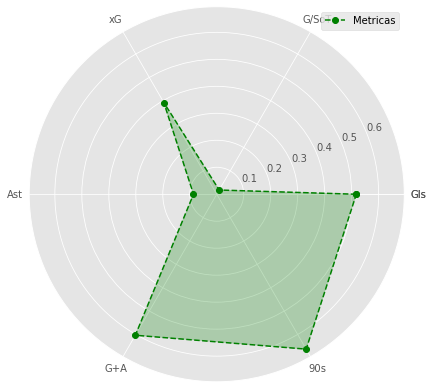

In [14]:
#Grafico hulk
plt.style.use('ggplot')
angles=np.linspace(0,2*np.pi,len(categorias), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
categorias.append(categorias[0])
valores.append(valores[0])

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)

#basic plot
ax.plot(angles,valores, 'o--', color='g', label='Metricas')

#fill plot
ax.fill(angles, valores, alpha=0.25, color='g')

#Add labels
ax.set_thetagrids(angles * 180/np.pi, categorias)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [15]:
#Atributos que vou escolher para atacantes: Gols(Gls), xG, porcentagem de gols por chutes ao gol(G/SoT), assistencias(Ast), participação em gol(G+A), e  minutos jogados.
filt2 = df_atacantes_metricas['Player'] == 'Germán Cano'
df_german = df_atacantes_metricas[filt2]
df_german.drop(columns = 'Player', inplace= True)

colunas = df_german.columns.tolist()
for coluna in colunas:
    if coluna != '90s':
        df_german[coluna] = df_german[coluna].map(lambda x: x / 34.2)

#Escalas > minutagem / 20
df_german['90s'] = df_german['90s'].map(lambda x: x / 35)


C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\833556769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_german.drop(columns = 'Player', inplace= True)
C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\833556769.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_german[coluna] = df_german[coluna].map(lambda x: x / 34.2)
C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\833556769.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [16]:
# Criando e normalizando dados
categorias2 = df_german.columns.tolist()
valores2 = (df_german.values.tolist())[0]
valores

[0.5172413793103449,
 0.01810344827586207,
 0.3922413793103448,
 0.08620689655172414,
 0.603448275862069,
 0.6628571428571428,
 0.5172413793103449]

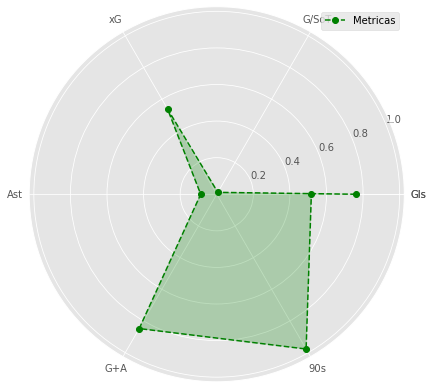

In [17]:
#Grafico german
plt.style.use('ggplot')
angles=np.linspace(0,2*np.pi,len(categorias2), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
categorias2.append(categorias2[0])
valores2.append(valores[0])

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)

#basic plot
ax.plot(angles,valores2, 'o--', color='g', label='Metricas')

#fill plot
ax.fill(angles, valores2, alpha=0.25, color='g')

#Add labels
ax.set_thetagrids(angles * 180/np.pi, categorias2)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [18]:
#Atributos que vou escolher para atacantes: Gols(Gls), xG, porcentagem de gols por chutes ao gol(G/SoT), assistencias(Ast), participação em gol(G+A), e  minutos jogados.
filt3 = df_atacantes_metricas['Player'] == 'Vitor Roque'
df_vitor = df_atacantes_metricas[filt3]
df_vitor.drop(columns = 'Player', inplace= True)


colunas = df_vitor.columns.tolist()

for coluna in colunas:
    if coluna != '90s':
        df_vitor[coluna] = df_vitor[coluna].map(lambda x: x / 14.6)

#Escalas > minutagem / 20
df_vitor['90s'] = df_vitor['90s'].map(lambda x: x / 35)
df_vitor

C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\2576320964.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vitor.drop(columns = 'Player', inplace= True)
C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\2576320964.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vitor[coluna] = df_vitor[coluna].map(lambda x: x / 14.6)
C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\2576320964.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Gls     G/SoT        xG       Ast       G+A       90s
707  0.342466  0.019863  0.390411  0.136986  0.479452  0.417143

In [19]:
# Criando e normalizando dados
categorias2 = df_vitor.columns.tolist()
valores2 = (df_vitor.values.tolist())[0]
valores2

[0.3424657534246575,
 0.019863013698630135,
 0.3904109589041096,
 0.136986301369863,
 0.4794520547945206,
 0.41714285714285715]

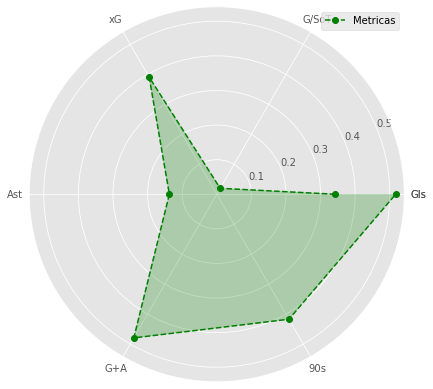

In [20]:
#Grafico roque
plt.style.use('ggplot')
angles=np.linspace(0,2*np.pi,len(categorias2), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
categorias2.append(categorias2[0])
valores2.append(valores[0])

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)

#basic plot
ax.plot(angles,valores2, 'o--', color='g', label='Metricas')

#fill plot
ax.fill(angles, valores2, alpha=0.25, color='g')

#Add labels
ax.set_thetagrids(angles * 180/np.pi, categorias2)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

Podemos fazer várias análises interessantes olhando os gráficos desses 3 atacantes. German e Hulk, jogaram um volume de jogos bem maior do que Vitor, talvez por isso, Vitor é quem tem as melhores métricas de gols e xG por minutos jogados. Ou seja, Roque jogou menos que German e Hulk, entretanto foi mais decisivo nos minutos que ele estava em campo. Também podemos analisar que os três atacantes tem uma quantidade baixa de assistências, o que indica que o forte dos 3 é fazer gols.


## Questão 4
- Faça o mesmo que na questão 3, mas para meio campistas.

In [31]:

df_mc = pd.read_csv(r"C:\Users\rodri\Desktop\Atividades\Ciencia_de_dados_futebol\atv2\mc_geral.txt", sep=',', skiprows=1)
df_mc_assists= pd.read_csv(r"C:\Users\rodri\Desktop\Atividades\Ciencia_de_dados_futebol\atv2\mc_assists.txt", sep=',', skiprows=1)

df_mc = df_mc[['Player', '90s', 'Succ%']]
df_mc_assists = df_mc_assists[['Player', 'Ast', 'xA', 'Cmp%', 'KP']]

df_atacantes_metricas = df_atacantes_metricas.sort_values(by ='Player').reset_index(drop= True)
df_atacantes_passes = df_atacantes_passes.sort_values(by ='Player').reset_index(drop= True)
df_mc_assists.drop(columns= 'Player', inplace= True)

for coluna in df_mc_assists.columns:
    df_mc[coluna] = df_mc_assists[coluna]

df_mc

Player   90s  Succ%  Ast   xA  Cmp%    KP
0                Abner  23.4   60.0    2  1.7  76.9  31.0
1            Adryelson  16.1  100.0    0  0.1  81.6   3.0
2                Adson  13.8   55.8    0  1.5  82.5  14.0
3               Airton  19.3   50.0    4  3.0  62.4  30.0
4       Carlos Alberto   1.7    0.0    0  0.0  54.2   1.0
..                 ...   ...    ...  ...  ...   ...   ...
758               Yago  12.6   29.4    0  1.4  77.6  14.0
759              Ytalo   6.9    0.0    0  0.2  88.1   4.0
760       Marcos Ytalo   1.8    0.0    0  0.1  77.6   3.0
761  Vinícius Zanocelo  22.3   48.1    0  0.8  83.9  21.0
762   Federico Zaracho  20.9   52.6    2  1.6  82.9  31.0

[763 rows x 7 columns]

Atributos escolhidos foram, quantos minutos ele jogou (90s), visto que, eu considero o jogador disponível para jogar muitos minutos, principalmente quando se trata de meio campistas, uma caracteristíca muito importate. Se formos analisar os melhores meio campistas da atualidade(Modric, Casemiro, Kevin De Bruyne e etc), eles jogam muitos minutos por temporada. Além disso, escolhi diferentes métricas, para traçar o perfil dos meio campistas, e a partir disso medir o quão bom eles são no que se propõe em fazer. Porcentagem de botes certeiros (Succ%), pois geralmente o meio campo da o primeiro combate com a cobertura do zagueiro ou lateral, Quantidade de assistências (Ast), para saber se é um meia atacante, e o quanto ele impacta nos gols do time, Excpeted assist(xA) para comparar qual a qualidade das jogadas ofensivas que ele cria, Porcentagem de passes completos(Cmp%) para saber o nível de saida de bola e passe daquele meio campista(algo que todos deveriam ter muito bem inclusive), e por último mas não menos importante Key passes (Kp), para analisar o quanto aquele meio campista ajuda na criação de jogadas para o time.

In [43]:
#Selecionando jogador
filt = df_mc['Player'] == 'Federico Zaracho'

df_mc_zaracho = df_mc[filt]
df_mc_zaracho
df_mc_zaracho.drop(columns = 'Player', inplace= True)
df_mc_zaracho

# #Escalas > tentar deixar os valores entre 0 e 10, o que for porcentagem divide por 10.
df_mc_zaracho['90s'] = df_mc_zaracho['90s'].map(lambda x: x /2)
df_mc_zaracho['Succ%'] = df_mc_zaracho['Succ%'].map(lambda x: x /10)	
df_mc_zaracho['Cmp%'] = df_mc_zaracho['Cmp%'].map(lambda x: x /10)
df_mc_zaracho['KP'] = df_mc_zaracho['KP'].map(lambda x: x /10)

df_mc_zaracho


C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\4171712031.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mc_zaracho.drop(columns = 'Player', inplace= True)
C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\4171712031.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mc_zaracho['90s'] = df_mc_zaracho['90s'].map(lambda x: x /2)
C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\4171712031.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

90s  Succ%  Ast   xA  Cmp%   KP
762  10.45   5.26    2  1.6  8.29  3.1

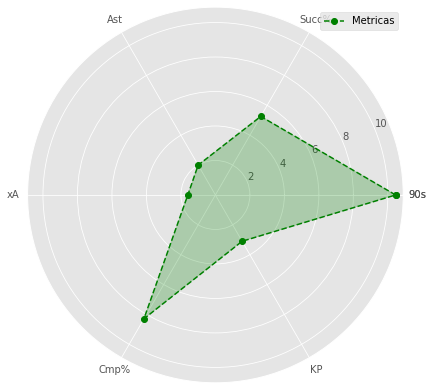

In [44]:
# Criando dados a serem plotados
categorias = df_mc_zaracho.columns.tolist()
valores = (df_mc_zaracho.values.tolist())[0]
valores

#Grafico Zaracho
plt.style.use('ggplot')
angles=np.linspace(0,2*np.pi,len(categorias), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
categorias.append(categorias[0])
valores.append(valores[0])

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)

#basic plot
ax.plot(angles,valores, 'o--', color='g', label='Metricas')

#fill plot
ax.fill(angles, valores, alpha=0.25, color='g')

#Add labels
ax.set_thetagrids(angles * 180/np.pi, categorias)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [45]:
filt = df_mc['Player'] == 'Gustavo Scarpa'

df_mc_scarpa = df_mc[filt]
df_mc_scarpa.drop(columns = 'Player', inplace= True)
df_mc_scarpa

# #Escalas > tentar deixar os valores entre 0 e 10, o que for porcentagem divide por 10.
df_mc_scarpa['90s'] = df_mc_scarpa['90s'].map(lambda x: x /2)
df_mc_scarpa['Succ%'] = df_mc_scarpa['Succ%'].map(lambda x: x /10)	
df_mc_scarpa['Cmp%'] = df_mc_scarpa['Cmp%'].map(lambda x: x /10)
df_mc_scarpa['KP'] = df_mc_scarpa['KP'].map(lambda x: x /10)

df_mc_scarpa


C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\2855113853.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mc_scarpa.drop(columns = 'Player', inplace= True)
C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\2855113853.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mc_scarpa['90s'] = df_mc_scarpa['90s'].map(lambda x: x /2)
C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\2855113853.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

90s  Succ%  Ast    xA  Cmp%    KP
660  14.3   3.73   13  10.1  6.74  11.6

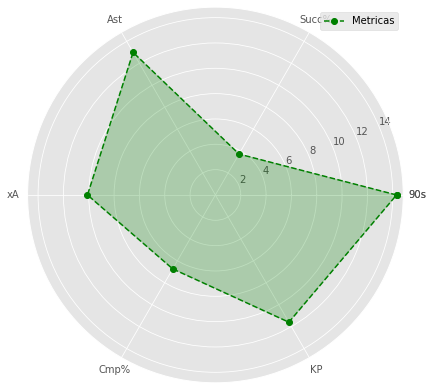

In [46]:
# Criando dados a serem plotados
categorias = df_mc_scarpa.columns.tolist()
valores = (df_mc_scarpa.values.tolist())[0]
valores

#Grafico Scarpa
plt.style.use('ggplot')
angles=np.linspace(0,2*np.pi,len(categorias), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
categorias.append(categorias[0])
valores.append(valores[0])

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)

#basic plot
ax.plot(angles,valores, 'o--', color='g', label='Metricas')

#fill plot
ax.fill(angles, valores, alpha=0.25, color='g')

#Add labels
ax.set_thetagrids(angles * 180/np.pi, categorias)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [47]:
filt = df_mc['Player'] == 'Lucas Sasha'

df_mc_sasha = df_mc[filt]
df_mc_sasha.drop(columns = 'Player', inplace= True)
df_mc_sasha

# #Escalas > tentar deixar os valores entre 0 e 10, o que for porcentagem divide por 10.
df_mc_sasha['90s'] = df_mc_sasha['90s'].map(lambda x: x /2)
df_mc_sasha['Succ%'] = df_mc_sasha['Succ%'].map(lambda x: x /10)	
df_mc_sasha['Cmp%'] = df_mc_sasha['Cmp%'].map(lambda x: x /10)
df_mc_sasha['KP'] = df_mc_sasha['KP'].map(lambda x: x /10)

df_mc_sasha




C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\552152395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mc_sasha.drop(columns = 'Player', inplace= True)
C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\552152395.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mc_sasha['90s'] = df_mc_sasha['90s'].map(lambda x: x /2)
C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\552152395.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

90s  Succ%  Ast   xA  Cmp%   KP
655  7.05   5.56    0  0.2  7.99  0.4

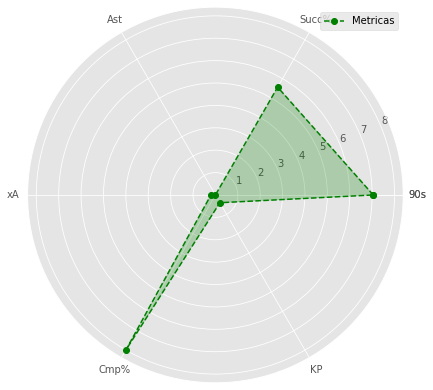

In [48]:
# Criando dados a serem plotados
categorias = df_mc_sasha.columns.tolist()
valores = (df_mc_sasha.values.tolist())[0]
valores

#Grafico Sasha
plt.style.use('ggplot')
angles=np.linspace(0,2*np.pi,len(categorias), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
categorias.append(categorias[0])
valores.append(valores[0])

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)

#basic plot
ax.plot(angles,valores, 'o--', color='g', label='Metricas')

#fill plot
ax.fill(angles, valores, alpha=0.25, color='g')

#Add labels
ax.set_thetagrids(angles * 180/np.pi, categorias)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

Podemos notar que os três tem caracteristicas bem diferentes, Scarpa e o Sasha são quase que meio campistas com funções totalmente opostas, Scarpa um meia muito de criação com uma quantidade de assists e Key passes gigantesca se comparado aos outros, já Sasha tem métricas defensivas bem mais acentuadas. Ademais, Zaracho fica no meio termo entre as caracteristicas dos dois. Podemos notar também que Scarpa tem qualidades gritantes, dos três comparados, disparadamente o que mais entrega de acordo com suas caracteristicas.


## Questão 5
- Faça o mesmo que na questão 3, mas para zagueiros.

In [52]:
#Df zagueiros
df_zag= pd.read_csv(r"C:\Users\rodri\Desktop\Atividades\Ciencia_de_dados_futebol\atv2\zagueiro.txt", sep=',', skiprows=1)

df_zag = df_zag[['Player', '90s', 'Tkl%', 'Sh', 'Pass', 'Err', 'Lost']]
df_zag

Player   90s  Tkl%    Sh  Pass  Err  Lost
0                Abner  23.4  63.2   3.0  15.0  0.0  14.0
1            Adryelson  16.1  80.0  12.0   6.0  0.0   2.0
2                Adson  13.8  54.5   0.0  18.0  0.0  10.0
3               Airton  19.3  38.5   5.0  12.0  0.0  24.0
4       Carlos Alberto   1.7  25.0   0.0   2.0  1.0   3.0
..                 ...   ...   ...   ...   ...  ...   ...
758               Yago  12.6  65.2   6.0  14.0  0.0   8.0
759              Ytalo   6.9  25.0   1.0   6.0  0.0   3.0
760       Marcos Ytalo   1.8   0.0   0.0   1.0  0.0   2.0
761  Vinícius Zanocelo  22.3  21.7   8.0  20.0  0.0  36.0
762   Federico Zaracho  20.9  32.3   2.0  31.0  0.0  42.0

[763 rows x 7 columns]

Para zagueiros, eu valorizo muito a quantidade baixa de erro nas ações algo muito importante, visto que, um erro na defesa pode ser fatal. A vista disso, escolhi atributos que medem a qualidade de atributos defensivos, e atributos em percentual, justamente para medir o quanto zagueiro erra. Para todas as análises, eu utilizo o 90s, pois acho importante medir o quão disponível e acionado aquele atleta foi durante a temporada, acho que ajuda a tornar uma análise melhor.
Logo, atributos escolihos: minutos jogados normalizados (90s), Porcentagem de dribles impedidos (Tkl%),  quantidade de chutes bloqueados (Sh), quantidade de passes bloqueados (Pass), erros que levam ao oponente chutar(Err), quantidade de vezes que foi driblado (Lost)

In [67]:
#Selecionando jogador
filt = df_zag['Player'] == 'Nathan Silva'

df_nathan = df_zag[filt]
df_nathan
df_nathan.drop(columns = 'Player', inplace= True)
df_nathan

# # #Escalas > tentar deixar os valores entre 0 e 10, o que for porcentagem divide por 10.
df_nathan['90s'] = df_nathan['90s'].map(lambda x: x /3)
df_nathan['Tkl%'] = df_nathan['Tkl%'].map(lambda x: x /10)	
df_nathan['Sh'] = df_nathan['Sh'] .map(lambda x: x /5)
df_nathan['Pass'] = df_nathan['Pass'].map(lambda x: x /3)
df_nathan['Lost'] = df_nathan['Lost'].map(lambda x: x /2)

df_nathan


C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\425439278.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nathan.drop(columns = 'Player', inplace= True)
C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\425439278.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nathan['90s'] = df_nathan['90s'].map(lambda x: x /3)
C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\425439278.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

90s  Tkl%   Sh      Pass  Err  Lost
675  6.4  6.92  2.4  1.666667  0.0   2.0

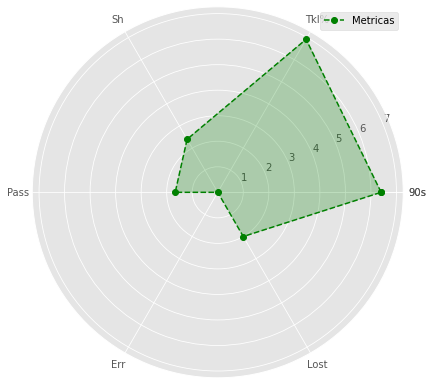

In [68]:
# Criando dados a serem plotados
categorias = df_nathan.columns.tolist()
valores = (df_nathan.values.tolist())[0]
valores

#Grafico Nathan
plt.style.use('ggplot')
angles=np.linspace(0,2*np.pi,len(categorias), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
categorias.append(categorias[0])
valores.append(valores[0])

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)

#basic plot
ax.plot(angles,valores, 'o--', color='g', label='Metricas')

#fill plot
ax.fill(angles, valores, alpha=0.25, color='g')

#Add labels
ax.set_thetagrids(angles * 180/np.pi, categorias)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [73]:
#Selecionando jogador
filt = df_zag['Player'] == 'Gustavo Gómez'

df_gustavo = df_zag[filt]
df_gustavo
df_gustavo.drop(columns = 'Player', inplace= True)
df_gustavo

# # #Escalas > tentar deixar os valores entre 0 e 10, o que for porcentagem divide por 10.
df_gustavo['90s'] = df_gustavo['90s'].map(lambda x: x /3)
df_gustavo['Tkl%'] = df_gustavo['Tkl%'].map(lambda x: x /10)	
df_gustavo['Sh'] = df_gustavo['Sh'] .map(lambda x: x /5)
df_gustavo['Pass'] = df_gustavo['Pass'].map(lambda x: x /3)
df_gustavo['Lost'] = df_gustavo['Lost'].map(lambda x: x /2)
df_gustavo

C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\758922491.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gustavo.drop(columns = 'Player', inplace= True)
C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\758922491.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gustavo['90s'] = df_gustavo['90s'].map(lambda x: x /3)
C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\758922491.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

90s  Tkl%   Sh  Pass  Err  Lost
261  10.0  5.86  6.0   5.0  0.0   6.0

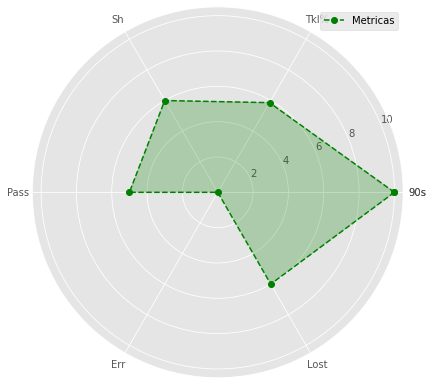

In [70]:
# Criando dados a serem plotados
categorias = df_gustavo.columns.tolist()
valores = (df_gustavo.values.tolist())[0]
valores

#Grafico GG
plt.style.use('ggplot')
angles=np.linspace(0,2*np.pi,len(categorias), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
categorias.append(categorias[0])
valores.append(valores[0])

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)

#basic plot
ax.plot(angles,valores, 'o--', color='g', label='Metricas')

#fill plot
ax.fill(angles, valores, alpha=0.25, color='g')

#Add labels
ax.set_thetagrids(angles * 180/np.pi, categorias)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [72]:
#Selecionando jogador
filt = df_zag['Player'] == 'Nino'

df_nino = df_zag[filt]
df_nino
df_nino.drop(columns = 'Player', inplace= True)
df_nino


# # #Escalas > tentar deixar os valores entre 0 e 10, o que for porcentagem divide por 10.
df_nino['90s'] = df_nino['90s'].map(lambda x: x /3)
df_nino['Tkl%'] = df_nino['Tkl%'].map(lambda x: x /10)	
df_nino['Sh'] = df_nino['Sh'] .map(lambda x: x /5)
df_nino['Pass'] = df_nino['Pass'].map(lambda x: x /3)
df_nino['Lost'] = df_nino['Lost'].map(lambda x: x /2)
df_nino

C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\1313033076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nino.drop(columns = 'Player', inplace= True)
C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\1313033076.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nino['90s'] = df_nino['90s'].map(lambda x: x /3)
C:\Users\rodri\AppData\Local\Temp\ipykernel_29308\1313033076.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

90s  Tkl%   Sh      Pass  Err  Lost
485  9.3   6.0  3.4  3.333333  0.0   4.0

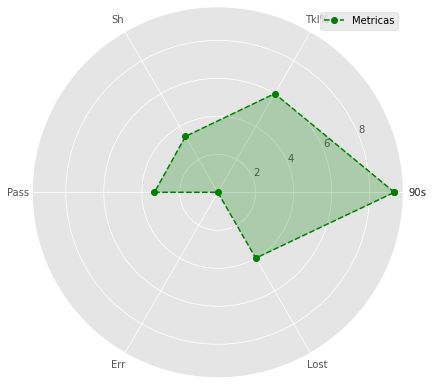

In [74]:
# Criando dados a serem plotados
categorias = df_nino.columns.tolist()
valores = (df_nino.values.tolist())[0]
valores

#Grafico Nino
plt.style.use('ggplot')
angles=np.linspace(0,2*np.pi,len(categorias), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
categorias.append(categorias[0])
valores.append(valores[0])

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)

#basic plot
ax.plot(angles,valores, 'o--', color='g', label='Metricas')

#fill plot
ax.fill(angles, valores, alpha=0.25, color='g')

#Add labels
ax.set_thetagrids(angles * 180/np.pi, categorias)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

De todas as posições, os gráficos de zagueiros foram os que deram menos discrepância, evidenciando a dificuldade de medir a qualidade destes atletas por meio de estatísticas. Podemos análisar de crítico, indicadores que estão associados a quantidade de erros daqueles atletas. A métrica que mais deu diferença foi a porcentagem de tackles bem sucedidos do Nathan Silva, o que pode indicar que ele só se coloca nessa posição quando tem vantagem para realizar o tackle.


## Questão 6
- Discuta as diferenças entre os radares das questões 3, 4 e 5. Quais são as principais diferenças entre os atributos relevantes para cada posição? Quais são as principais semelhanças? A impressão subjetiva que você tinha dos jogadores se comprovou pelos radares? Se não, por quê? Quais posições são mais difíceis de serem avaliadas por estatísticas?

Gostaria de ressaltar estes pontos:

Zagueiros: Posição extremamente difícil de escolher atributos relevantes, visto que, certos atributos como quantidade de duelos 1x1 ganhos, num jogo ideal, não deveria nem existir. A marcação em alto nível que é comprovadamente eficaz, é quando o marcador tem um ou mais jogadores na cobertura daquela marcação. Dito isso, foi bem difícil escolher os atributos mais relevantes para diferentes perfis de zagueiros. Ademais, a impressão subjetiva que eu tinha dos zagueiros escolhidos foi levemente alterada, visto que, quando se coloca métricas  com certo tipo de normalização (exemplo: porcentagem de 'tackles' certos dividido pela quantidade total de 'tackles') é mais nítido a eficácia daquele zagueiro, visto que, um erro como zagueiro pode custar muito.

Meio campistas: A posição talvez mais ampla, podendo ser avalida de forma específica (ninchando por exemplo volantes, meias centrais e meia atacantes) e assim escolhendo atributos que façam sentido para aquele sub-setor do meio campo. Ou então, pode-se fazer a abordagem que eu utilizei de traçar atributos mais gerais, e ver em qual perfil aquele meio campo se encaixa, e o quão bom ele é, no que ele se propõe a fazer. Desta forma, os dados plotados só confirmou a impressão que eu tinha, entretanto me supreendi com resultado do Scarpa (imaginava que ele era bom, mas nem tanto.)

Atacantes: Embora, pode-se dividir os atacantes em sub-setores ou diferentes funções, tal como ponta e centroavente, eu acho que é a posição mais ninchada e que é mais palpável de ser avalida por estatística, visto que, é possível traçar diferentes abordagens e diferentes estratégias para medir por exemplo, o quão consistente um atacante é, ou quão decisivo (inclusive de ser decisivo foi a abordagem que utilizei).